# 1장 케라스 시작

In [54]:
import keras

print(keras.backend.backend())

tensorflow


In [55]:
import numpy as np

x = np.array([0, 1, 2, 3, 4])
y = x * 2 + 1

In [56]:
import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1, )))
model.compile(optimizer='SGD', loss='mse')

model.fit(x[:2], y[:2], epochs=1000, verbose=0)

print('Targets:', y[2:])
print('Predictions:', model.predict(x[2:]).flatten())

Targets: [5 7 9]
1/1 [==============================] - 0s 29ms/step
Predictions: [5.000634 7.001093 9.001552]


# 2장 ANN

In [ ]:
# 분산 방식 모델링, 함수형 구현
from keras import layers, models

x = layers.Input(shape=(None, ))
h = layers.Activation('relu')(layers.Dense(None)(x))
y = layers.Activation('softmax')(layers.Dense(None)(h))

model = models.Model(x, y)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 연쇄 방식 모델링, 함수형 구현
model = models.Sequential() # 모델 구조 정의 전 Sequential로 초기화
model.add(layers.Dense(None, activation='relu', input_shape=(None, )))
model.add(layers.Dense(None, activation='softmax'))

In [ ]:
# 분산 방식 모델링, 객체지향형 구현
class ANN(models.Model):
    def __init__(self, input_num, hidden_num, output_num, **kwargs):
        hidden = layers.Dense(hidden_num)
        output = layers.Dense(output_num)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        super().__init__(**kwargs)

model = ANN(input_num, hidden_num, output_num)

In [45]:
# 연쇄 방식 모델링, 객체지향형 구현
class ANN(models.Sequential):
    def __init__(self, input_num, hidden_num, output_num, **kwargs):
        super().__init__(**kwargs)
        self.add(layers.Dense(hidden_num, activation='relu', input_shape=(input_num, )))
        self.add(layers.Dense(output_num, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
import numpy as np
# from keras import datasets  #mnist
from keras.datasets import mnist    # 이렇게 불러와야 실행됨
from keras.utils import np_utils # to_categorical

def Data_func():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W*H)
    X_test = X_test.reshape(-1, W*H)

    X_train = X_train/255.0
    X_test = X_test/255.0

    return (X_train, y_train), (X_test, y_test)

In [50]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [51]:
input_num = 784
hidden_num = 100
number_of_class = 10
output_num = number_of_class
model = ANN(input_num, hidden_num, output_num)
(X_train, y_train), (X_test, y_test) = Data_func()

history = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2)

performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test loss and Accuracy -> {: .2f}, {: .2f}'.format(*performance_test))

Epoch 1/5
480/480 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8901 - val_loss: 0.2071 - val_accuracy: 0.9423
Epoch 2/5
480/480 [==============================] - 1s 2ms/step - loss: 0.1844 - accuracy: 0.9471 - val_loss: 0.1710 - val_accuracy: 0.9513
Epoch 3/5
480/480 [==============================] - 1s 3ms/step - loss: 0.1362 - accuracy: 0.9611 - val_loss: 0.1347 - val_accuracy: 0.9619
Epoch 4/5
480/480 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.9689 - val_loss: 0.1173 - val_accuracy: 0.9677
Epoch 5/5
480/480 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9755 - val_loss: 0.1176 - val_accuracy: 0.9643


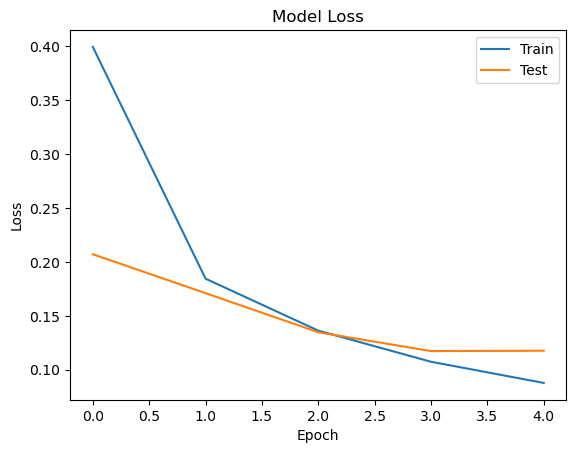

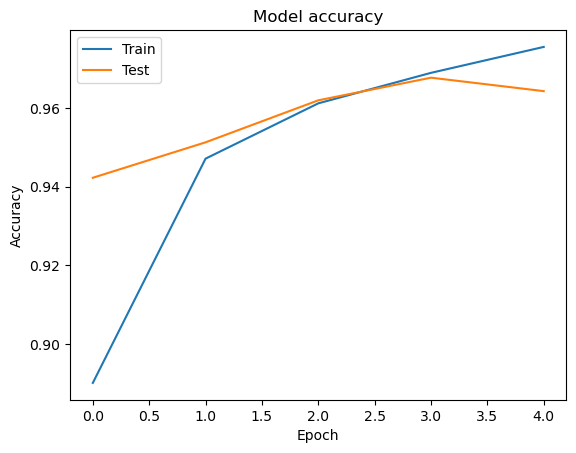

In [52]:
plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

In [ ]:
# 시계열
from keras import layers, models

class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        x = layers.Input(shape=(Nin, ))
        h = relu(hidden(x))
        y = output(h)

        super.__init__(x, y)
        self.compile(loss='mse', optimizer='sgd')

# 보스턴 집값 데이터
from keras.datasets import boston_housing
from sklearn import preprocessing

def Data_func():
    (X_train, y_train), (X_test, y_test) = boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return (X_train, y_train), (X_test, y_test)

# 시각화
from original.keraspp.skeras import plot_loss
import matplotlib.pyplot as plt

def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {: .2f}'.format(performance_test))

    plot_loss()
    plt.show()

# 3장 DNN

In [ ]:
from keras import layers, models

Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_1, Nout):
        super().__init__()

        self.add(layers.Dense(Nh_1[0], activation='relu', input_shape=(Nin, ), name='Hidden-1'))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(Nh_1[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dropout(0.2))
        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils # to_categorical

def Data_func():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W*H)
    X_test = X_test.reshape(-1, W*H)

    X_train = X_train/255.0
    X_test = X_test/255.0

    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = Data_func()

model = DNN(Nin, Nh_l, Nout)
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

In [60]:
# 컬러 이미지
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils

def Data_func():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W*H*C)
    X_test = X_test.reshape(-1, W*H*C)

    X_train = X_train/255.0
    X_test = X_test/255.0

    return (X_train, y_train), (X_test, y_test)


# 모델링
from keras import layers, models

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()

        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin, ), name='Hiiden-1'))
        self.add(layers.Dropout(Pd_l[0]))
        self.add(layers.Dense(Nh_l[1], activation='relu', input_shape=(Nin, ), name='Hiiden-2'))
        self.add(layers.Dropout(Pd_l[1]))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# 학습 및 시각화
from original.keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

Nh_l = [100, 50]
Pd_l = [0.0, 0.0]
number_of_class = 10
Nout = number_of_class

(X_train, y_train), (X_test, y_test) = Data_func()
model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

plot_acc(history)
plt.show(block=False)
plt.pause(2)
plt.close()
plot_loss(history)
plt.show(block=False)
plt.pause(2)
plt.close()

Epoch 1/10
400/400 [==============================] - 2s 4ms/step - loss: 1.9475 - acc: 0.2951 - val_loss: 1.8793 - val_acc: 0.3203
Epoch 2/10
400/400 [==============================] - 1s 3ms/step - loss: 1.7604 - acc: 0.3718 - val_loss: 1.7403 - val_acc: 0.3781
Epoch 3/10
400/400 [==============================] - 1s 4ms/step - loss: 1.6928 - acc: 0.3971 - val_loss: 1.7183 - val_acc: 0.3918
Epoch 4/10
400/400 [==============================] - 2s 4ms/step - loss: 1.6457 - acc: 0.4147 - val_loss: 1.6649 - val_acc: 0.4093
Epoch 5/10
400/400 [==============================] - 2s 4ms/step - loss: 1.6056 - acc: 0.4295 - val_loss: 1.6545 - val_acc: 0.4160
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 1.5757 - acc: 0.4402 - val_loss: 1.5973 - val_acc: 0.4353
Epoch 7/10
400/400 [==============================] - 2s 5ms/step - loss: 1.5502 - acc: 0.4475 - val_loss: 1.6023 - val_acc: 0.4369
Epoch 8/10
400/400 [==============================] - 2s 4ms/step - loss: 1.

# 4장 CNN

In [ ]:
import keras
from keras import models, layers
import keras.backend
import keras.optimizers

class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        # convolutionL 특징점 찾기
        self.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
        self.add(layers.Conv2D(64, (3,3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2,2)))  # pool_size: 1개의 값으로 변화할 크기
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())

        # dense: 실질적 분류 작업
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['acc'])

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 채널의 위치는 image_data_format에 따름
print(keras.backend.backend_config.image_data_format())

# 1 = 채널의 크기
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = X_test.reshape(*X_test.shape, 1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

## 채널의 위치가 앞 단에 존재할 경우
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
# input_shape = (1, X_train.shape[1], X_train.shape[2])

In [9]:
import keras
from keras import models, layers
import keras.backend
import keras.optimizers

class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        # convolutionL 특징점 찾기
        self.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
        self.add(layers.Conv2D(64, (3,3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2,2)))  # pool_size: 1개의 값으로 변화할 크기
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())

        # dense: 실질적 분류 작업
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['acc'])

from keras.datasets import mnist
class DATA():
    def __init__(self):
        num_classes = 10

        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        
        # 채널의 위치는 image_data_format에 따름
        print(keras.backend.backend_config.image_data_format())

        # 1 = 채널의 크기
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
        # X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
        X_test = X_test.reshape(*X_test.shape, 1)
        input_shape = (X_train.shape[1], X_train.shape[2], 1)

        ## 채널의 위치가 앞 단에 존재할 경우
        # X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
        # X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
        # input_shape = (1, X_train.shape[1], X_train.shape[2])

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        X_train /= 255
        X_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.X_train, self.y_train = X_train, y_train
        self.X_test, self.y_test = X_test, y_test

data = DATA()
model = CNN(data.input_shape, data.num_classes)
history = model.fit(data.X_train, data.y_train, batch_size=128, epochs=10, validation_split=0.2)
score = model.evaluate(data.X_test, data.y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_acc(history)
plt.show(block=False)
plt.pause(2)
plt.close()

plot_loss(history)
plt.show(block=False)
plt.pause(2)
plt.close()

channels_last
Epoch 1/10
375/375 [==============================] - 7s 13ms/step - loss: 2.2957 - acc: 0.1222 - val_loss: 2.2601 - val_acc: 0.2320
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 2.2410 - acc: 0.2110 - val_loss: 2.1960 - val_acc: 0.4262
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 2.1772 - acc: 0.3089 - val_loss: 2.1173 - val_acc: 0.5410
Epoch 4/10
375/375 [==============================] - 6s 17ms/step - loss: 2.0986 - acc: 0.3970 - val_loss: 2.0170 - val_acc: 0.6330
Epoch 5/10
375/375 [==============================] - 6s 17ms/step - loss: 1.9971 - acc: 0.4752 - val_loss: 1.8899 - val_acc: 0.6933
Epoch 6/10
375/375 [==============================] - 6s 17ms/step - loss: 1.8713 - acc: 0.5357 - val_loss: 1.7345 - val_acc: 0.7339
Epoch 7/10
375/375 [==============================] - 6s 17ms/step - loss: 1.7279 - acc: 0.5741 - val_loss: 1.5595 - val_acc: 0.7590
Epoch 8/10
375/375 [==============================] - 6

In [26]:
from keras import backend as K

K.__dict__

{'__name__': 'keras.backend',
 '__doc__': 'Keras backend API.',
 '__package__': 'keras',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x1bffa2e0610>,
 '__spec__': ModuleSpec(name='keras.backend', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001BFFA2E0610>, origin='c:\\Users\\why\\miniforge3\\envs\\study\\lib\\site-packages\\keras\\backend.py'),
 '__file__': 'c:\\Users\\why\\miniforge3\\envs\\study\\lib\\site-packages\\keras\\backend.py',
 '__cached__': 'c:\\Users\\why\\miniforge3\\envs\\study\\lib\\site-packages\\keras\\__pycache__\\backend.cpython-39.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in'),
  '__build_class__': <f

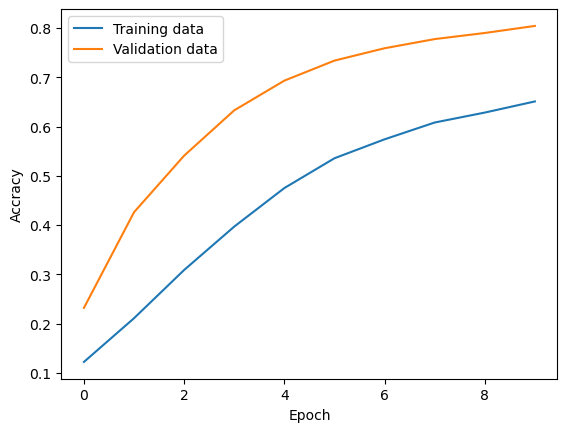

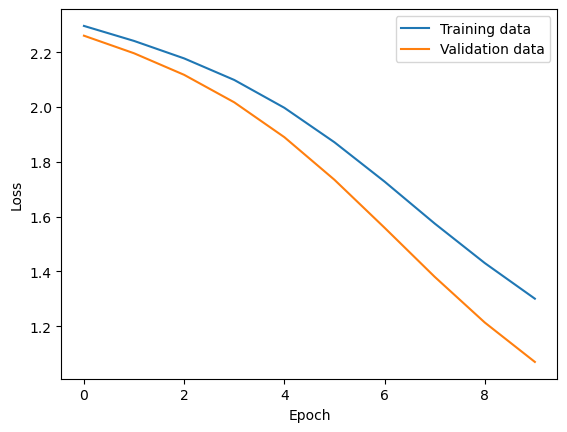

In [10]:
# 컬러

from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import os
from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from original.keraspp import skeras, sfile

class CNN(Model):
    def __init__(model, nb_classes, in_shape=None):
        model.nb_classes = nb_classes
        model.in_shape = in_shape
        model.build_model()
        super().__init__(model.x, model.y)
        model.compile()
    
    def build_model(model):
        nb_classes = model.nb_classes
        in_shape = model.in_shape

        x = Input(in_shape)
        h = Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=in_shape)(x)
        h = Conv2D(64, (3,3), activation='relu')(h)
        h = MaxPooling2D(pool_size=(2,2))(h)
        h = Dropout(0.25)(h)
        h = Flatten()(h)
        z_cl = h

        h = Dense(128, activation='relu')(h)
        h = Dropout(0.5)(h)
        z_fl = h

        y = Dense(nb_classes, activation='softmax', name='preds')(h)
        model.cl_part = Model(x, z_cl)
        model.fl_part = Model(x, z_fl)
        model.x, model.y = x, y

class DataSet():
    def __init__(self, X, y, nb_classes, scaling=True, test_size=0.2, random_state=0):
        self.X = X
        self.add_channels()
        X = self.X

        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=random_state)
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')

        if scaling:
            # scaling to have (0, 1) for each feature (each pixel)
            scaler = MinMaxScaler()
            n = X_train.shape[0]
            X_train = scaler.fit_transform(X_train.reshape(n, -1)).reshape(X_train.shape)
            n = X_test.shape[0]
            X_test = scaler.transform(X_test.reshape(n, -1)).reshape(X_test.shape)
            self.scaler = scaler
        
        y_train = np_utils.to_categorical(y_train, nb_classes)
        y_test = np_utils.to_categorical(y_test, nb_classes)
        
        self.X_train, self.X_test = X_train, X_test
        self.y_train, self.y_test = y_train, y_test
    
    def add_channels(self):
        X = self.X

        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape

            if K.image_data_format() == 'channels_first':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
            else:
                X = X.reshape(X.shape[0], img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)
        else:
            input_shape = X.shape[1:]   # channel is already included
        
        self.X = X
        self.input_shape = input_shape